# Evaluation report for forecasting_dl

## 본 문서에서는 main.py을 이용한 학습/추론 결과에 대한 상세한 평가 결과를 확인할 수 있습니다.

### 지원 기능
#### - Input Asset
- Input data 간략히 살펴보기
#### - Readiness, Bizprerocess Asset
- dataset의 변수 구성 요약
- dataset의 그룹별 시계열 길이 시각화
- dataset의 시계열 그래프 시각화
- 이동 평균 선 비교 시각화
- Target에 대한 ACF Plot와 PACF Plot
- Target에 대한 시계열 분해 시각화
#### - Train Asset
- CV별 평가 점수 비교 시각화
- CV별 실제 값과 예측 값 비교 시각화
#### - Inference Asset
- 예측 결과 살펴보기
- 예측 결과 시각화


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from copy import copy
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
%%capture --no-display
from wrapping import Wrapper, EvaluationReport
wrapper = Wrapper();

# Train pipeline

In [3]:
%%capture --no-display
pipeline = 'train_pipeline'
wrapper.run_train_pipeline();

## input asset
----

In [4]:
%%capture --no-display
input_asset_structure = wrapper.get_input_asset(wrapper.init_asset_structure, pipeline);

### input data 간략히 살펴보기

In [5]:
input_asset_structure.data['dataframe'].head(10)

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
5,2016-07-01 05:00:00,5.626,2.143,1.528,0.533,4.051,1.371,21.174000
6,2016-07-01 06:00:00,7.167,2.947,2.132,0.782,5.026,1.858,22.792000
7,2016-07-01 07:00:00,7.435,3.282,2.310,1.031,5.087,2.224,23.143999
8,2016-07-01 08:00:00,5.559,3.014,2.452,1.173,2.955,1.432,21.667000
9,2016-07-01 09:00:00,4.555,2.545,1.919,0.817,2.680,1.371,17.445999


## readiness asset
----

In [5]:
%%capture --no-display
readiness_asset_structure = wrapper.get_readiness_asset(input_asset_structure, pipeline);

### dataset의 변수 구성 요약

In [7]:
evaluationreport = EvaluationReport(asset_structure=readiness_asset_structure)
evaluationreport.summarize_variable_composition(evaluationreport.dataset, evaluationreport.config)

,Component,Count,List
0,Total columns,8,"[date, OT, HUFL, HULL, MUFL, MULL, LUFL, LULL]"
1,Target column,1,[OT]
2,Time column,1,[date]
3,X covaiates,6,"[HUFL, HULL, MUFL, MULL, LUFL, LULL]"
4,Groupkey column,1,[None]
5,Static covariates,-,-


### dataset의 시계열 그래프 시각화

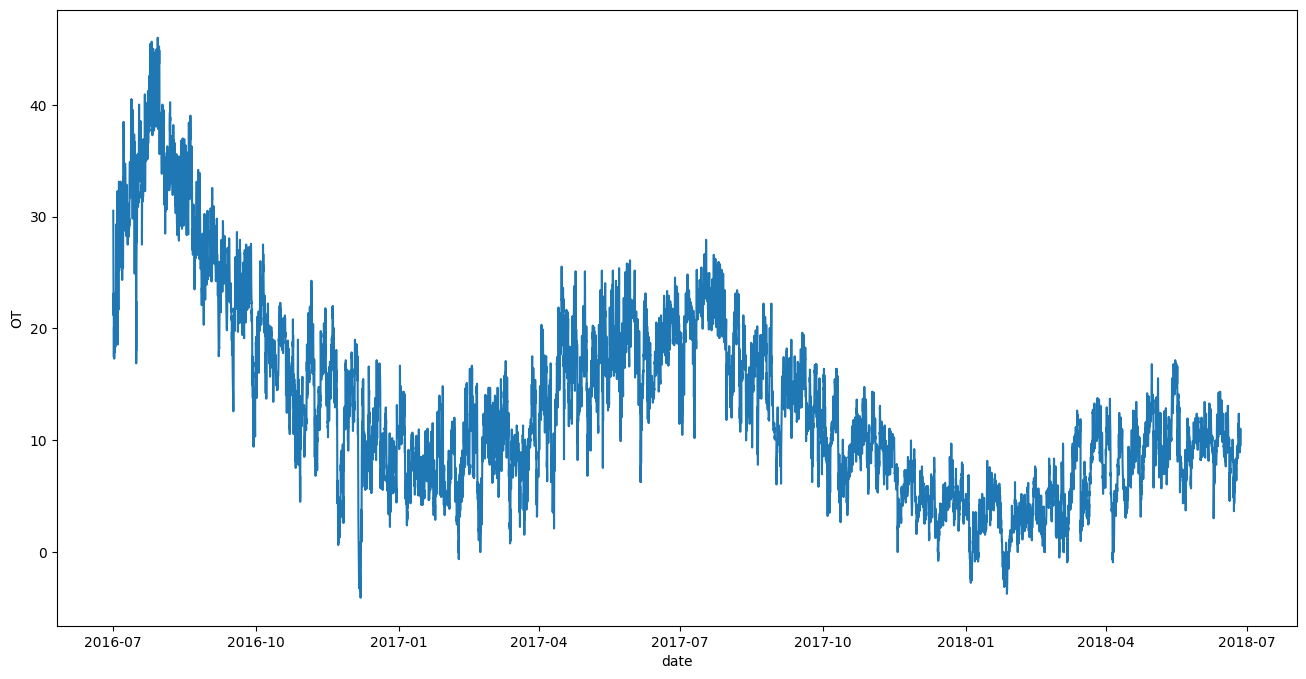

In [8]:
evaluationreport.timeseries_plot(evaluationreport.dataset, evaluationreport.config)

### 이동 평균 선 비교 시각화

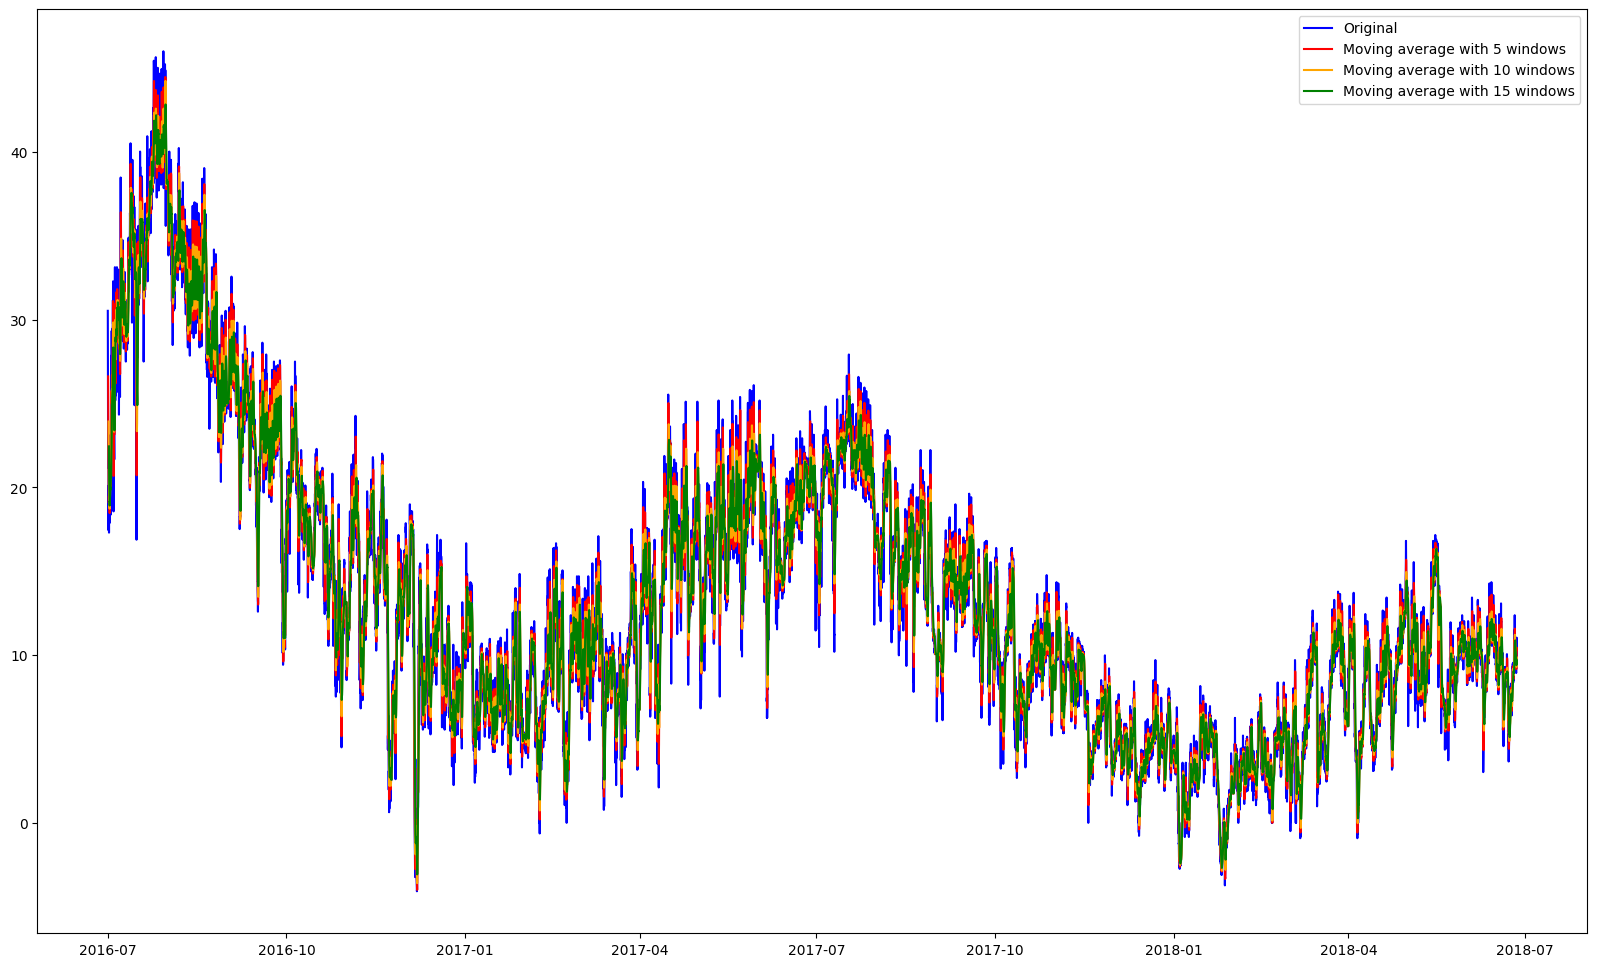

In [9]:
evaluationreport.moving_average_plot(evaluationreport.dataset, 
                                     evaluationreport.config, 
                                     moving_windows=[5, 10, 15],
                                     show_each=True)

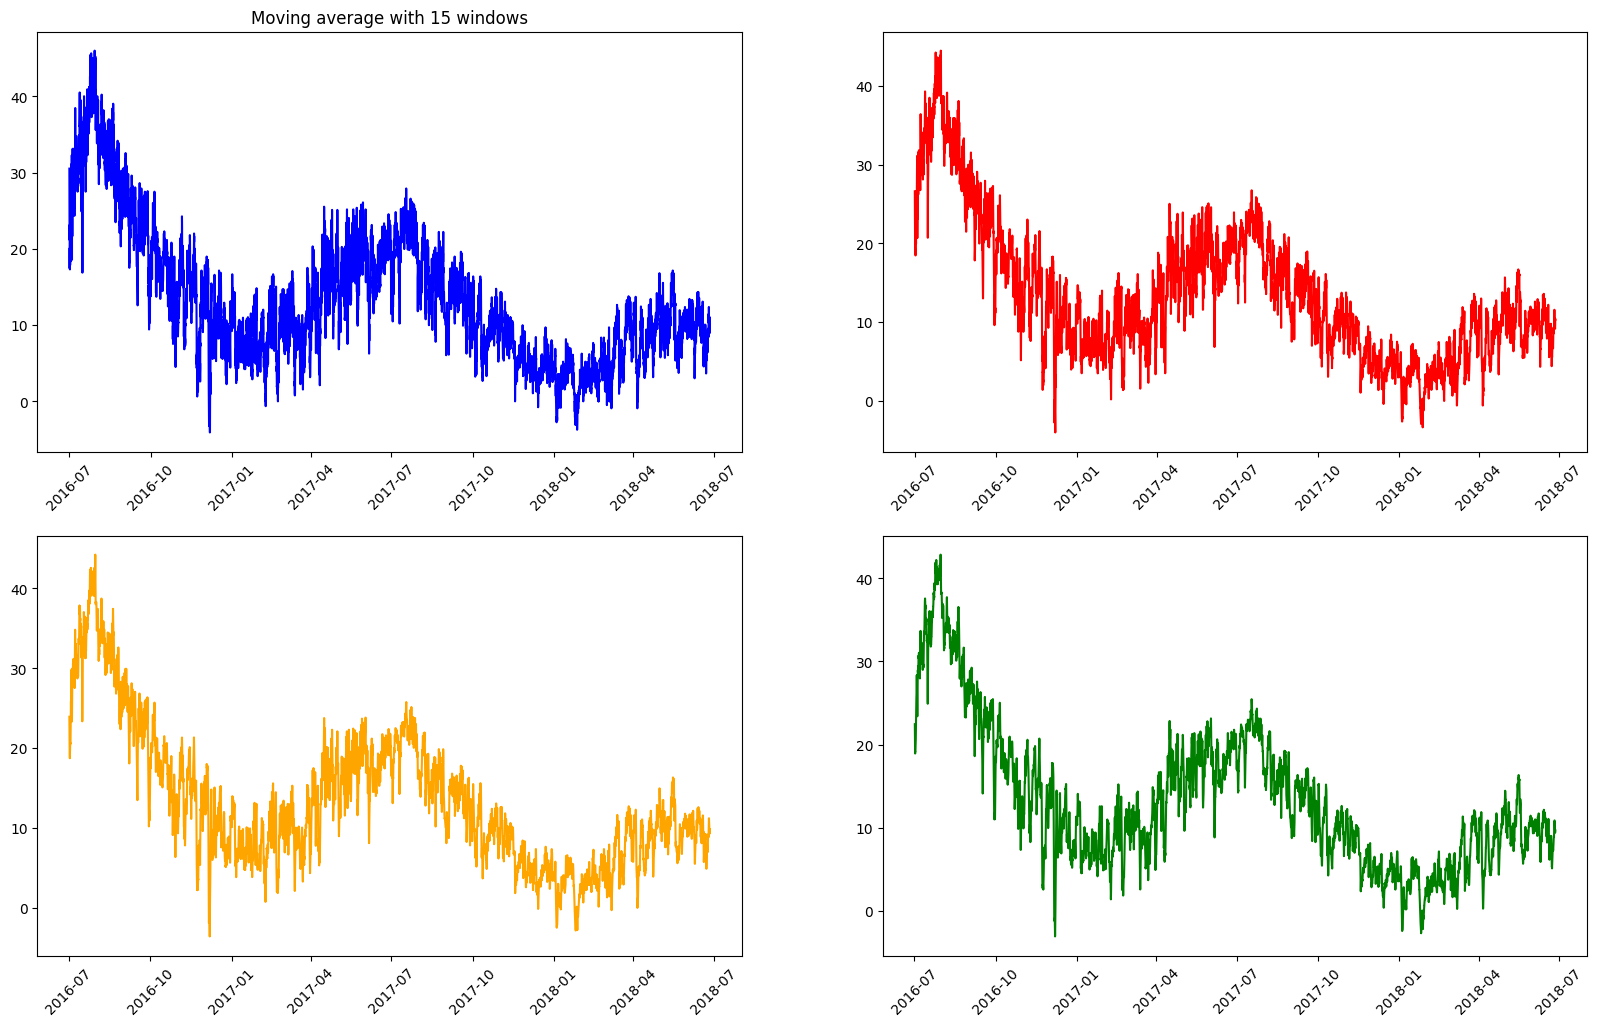

In [10]:
evaluationreport.moving_average_plot(evaluationreport.dataset, 
                                     evaluationreport.config, 
                                     moving_windows=[5, 10, 15],
                                     show_each=False)

### Target에 대한 ACF Plot와 PACF Plot

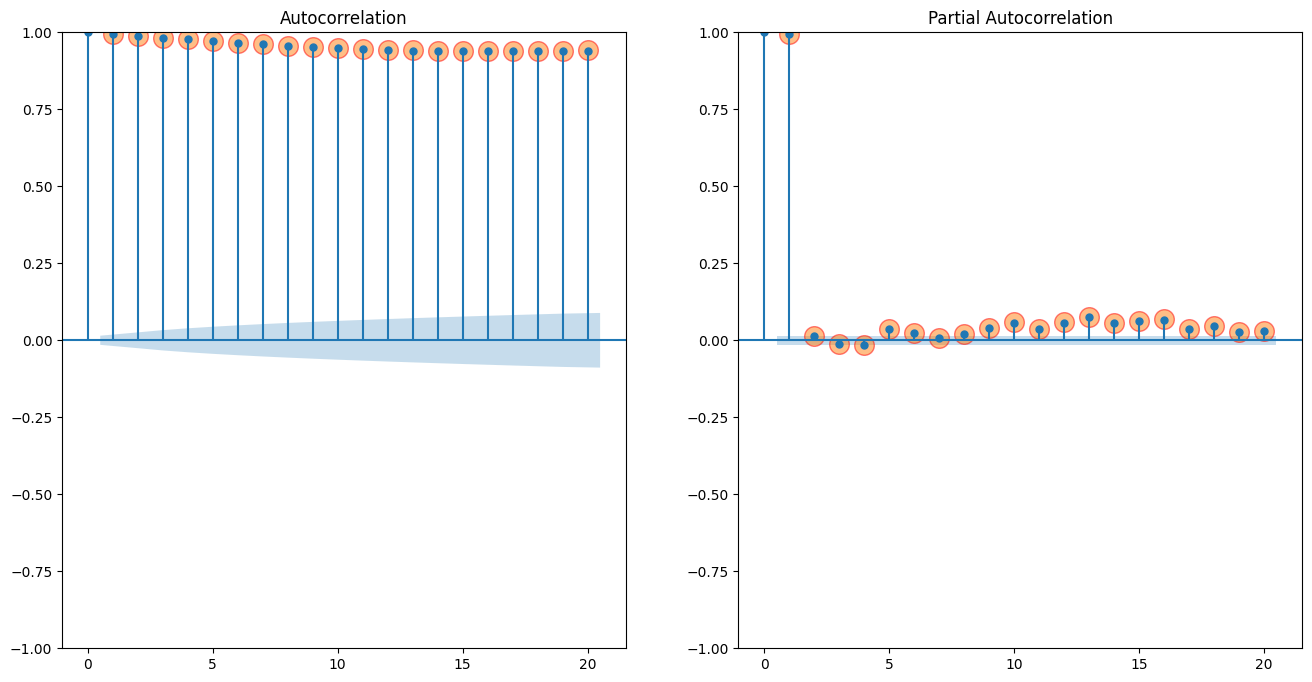

In [11]:
evaluationreport.timeseries_acf_pacf_plot(evaluationreport.dataset, evaluationreport.config)

### Target에 대한 시계열 분해 시각화

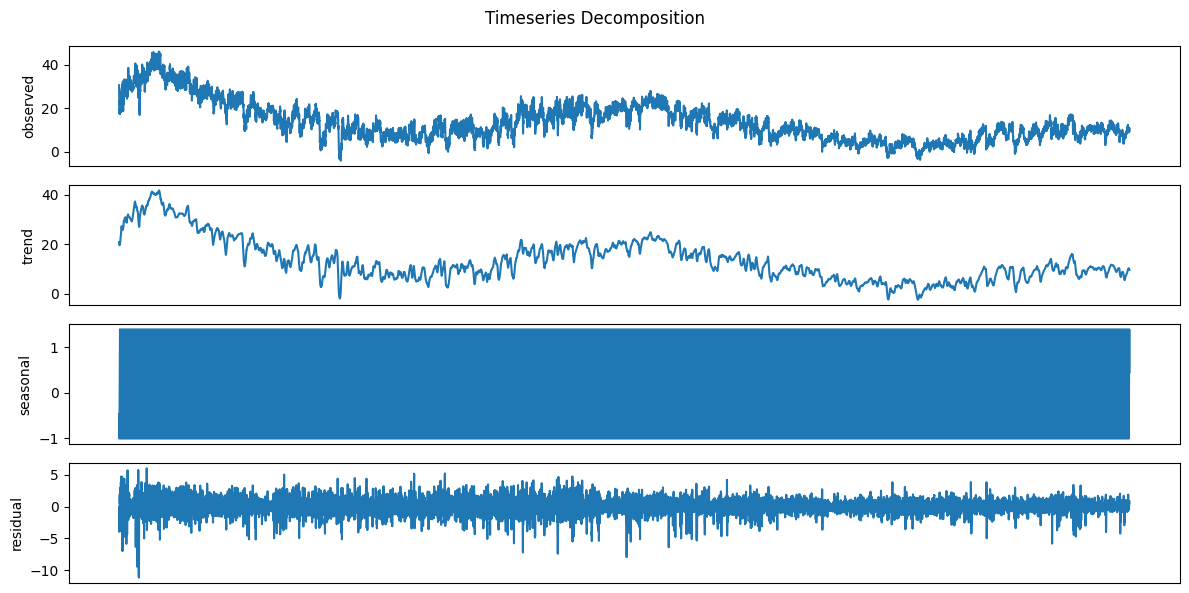

In [12]:
evaluationreport.timeseries_decomposition_plot(evaluationreport.dataset, evaluationreport.config, period=24)

## Bizpreprocess asset
----

In [6]:
%%capture --no-display
bizpreprocess_asset_structure = wrapper.get_bizpreprocess_asset(readiness_asset_structure, pipeline);

## Train asset
----

In [7]:
%%capture --no-display
cv_result_dict, cv_score_df = wrapper.get_train_asset_output();
train_asset_structure = copy(bizpreprocess_asset_structure)
evaluationreport = EvaluationReport(asset_structure=train_asset_structure)

### CV별 평가 점수 비교 시각화

In [8]:
cv_score_df

,CV,Train Period,Valid Period,SMAPE
0,CV1,2016-07-01 00:00:00 ~ 2018-06-21 19:00:00,2018-06-21 20:00:00 ~ 2018-06-26 19:00:00,20.601680
1,CV2,2016-07-01 00:00:00 ~ 2018-06-16 19:00:00,2018-06-16 20:00:00 ~ 2018-06-21 19:00:00,13.315248
2,CV3,2016-07-01 00:00:00 ~ 2018-06-11 19:00:00,2018-06-11 20:00:00 ~ 2018-06-16 19:00:00,10.236299


Groupkey의 종류가 많은 경우에는 chart_type을 'box'로 변경해주세요.

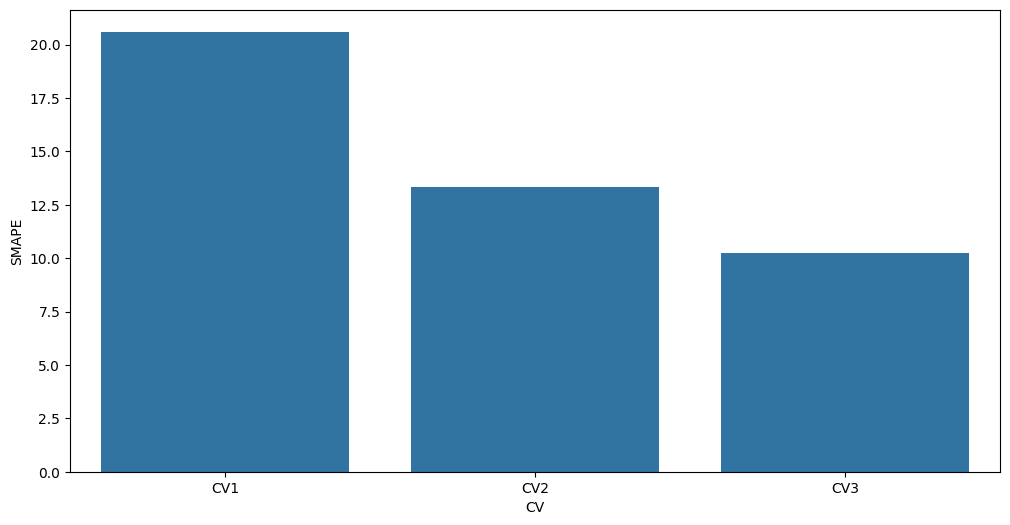

In [9]:
evaluationreport.train_cv_score_plot(evaluationreport.config,
                                     cv_score_df,
                                     chart_type='bar')

### CV별 실제 값과 예측 값 비교 시각화

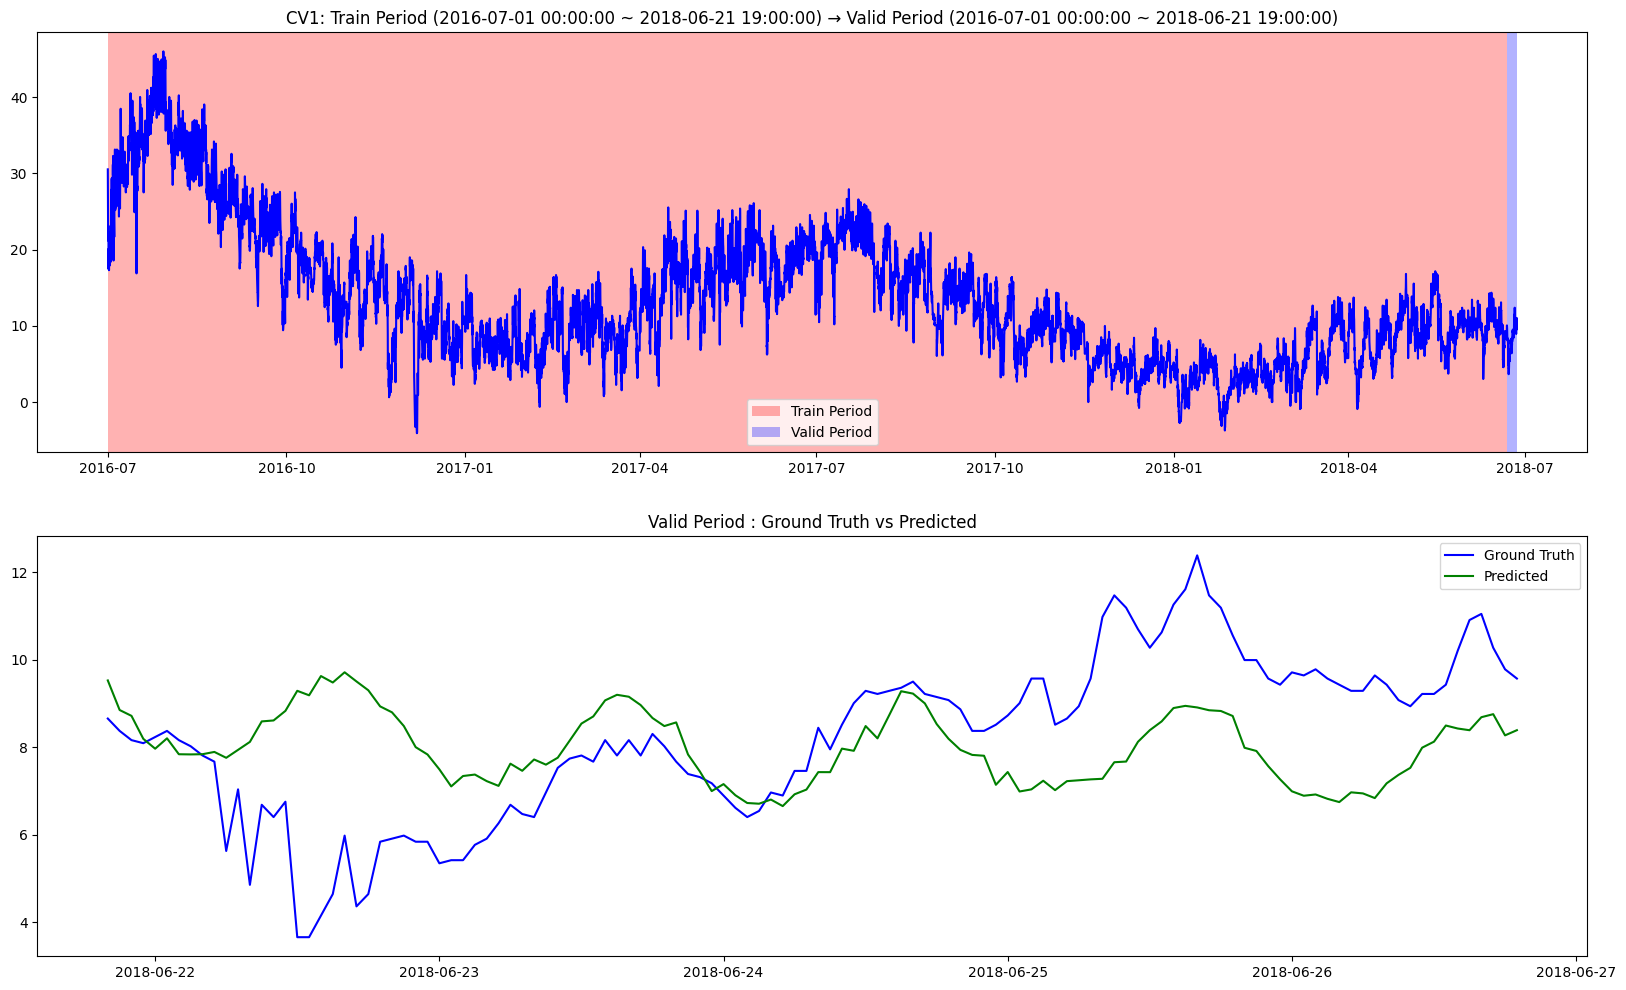

In [10]:
evaluationreport.train_cv_prediction_plot(evaluationreport.config,
                                          cv_result_dict,
                                          cv_score_df,
                                          cv='CV1')

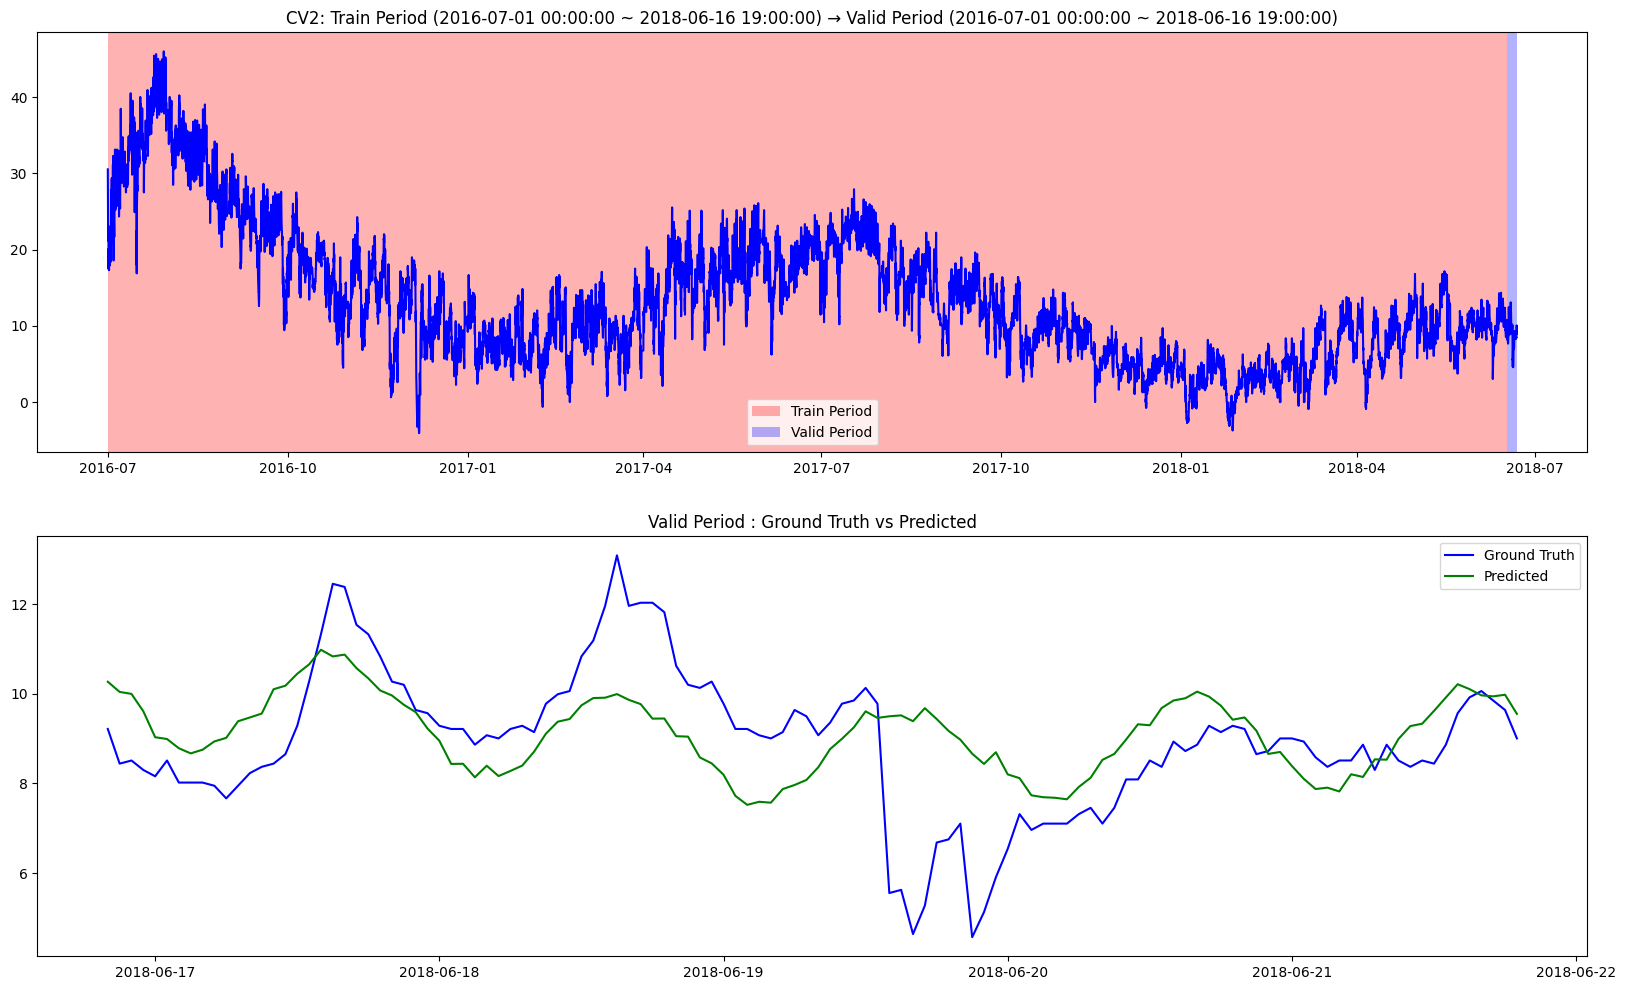

In [11]:
evaluationreport.train_cv_prediction_plot(evaluationreport.config,
                                          cv_result_dict,
                                          cv_score_df,
                                          cv='CV2')

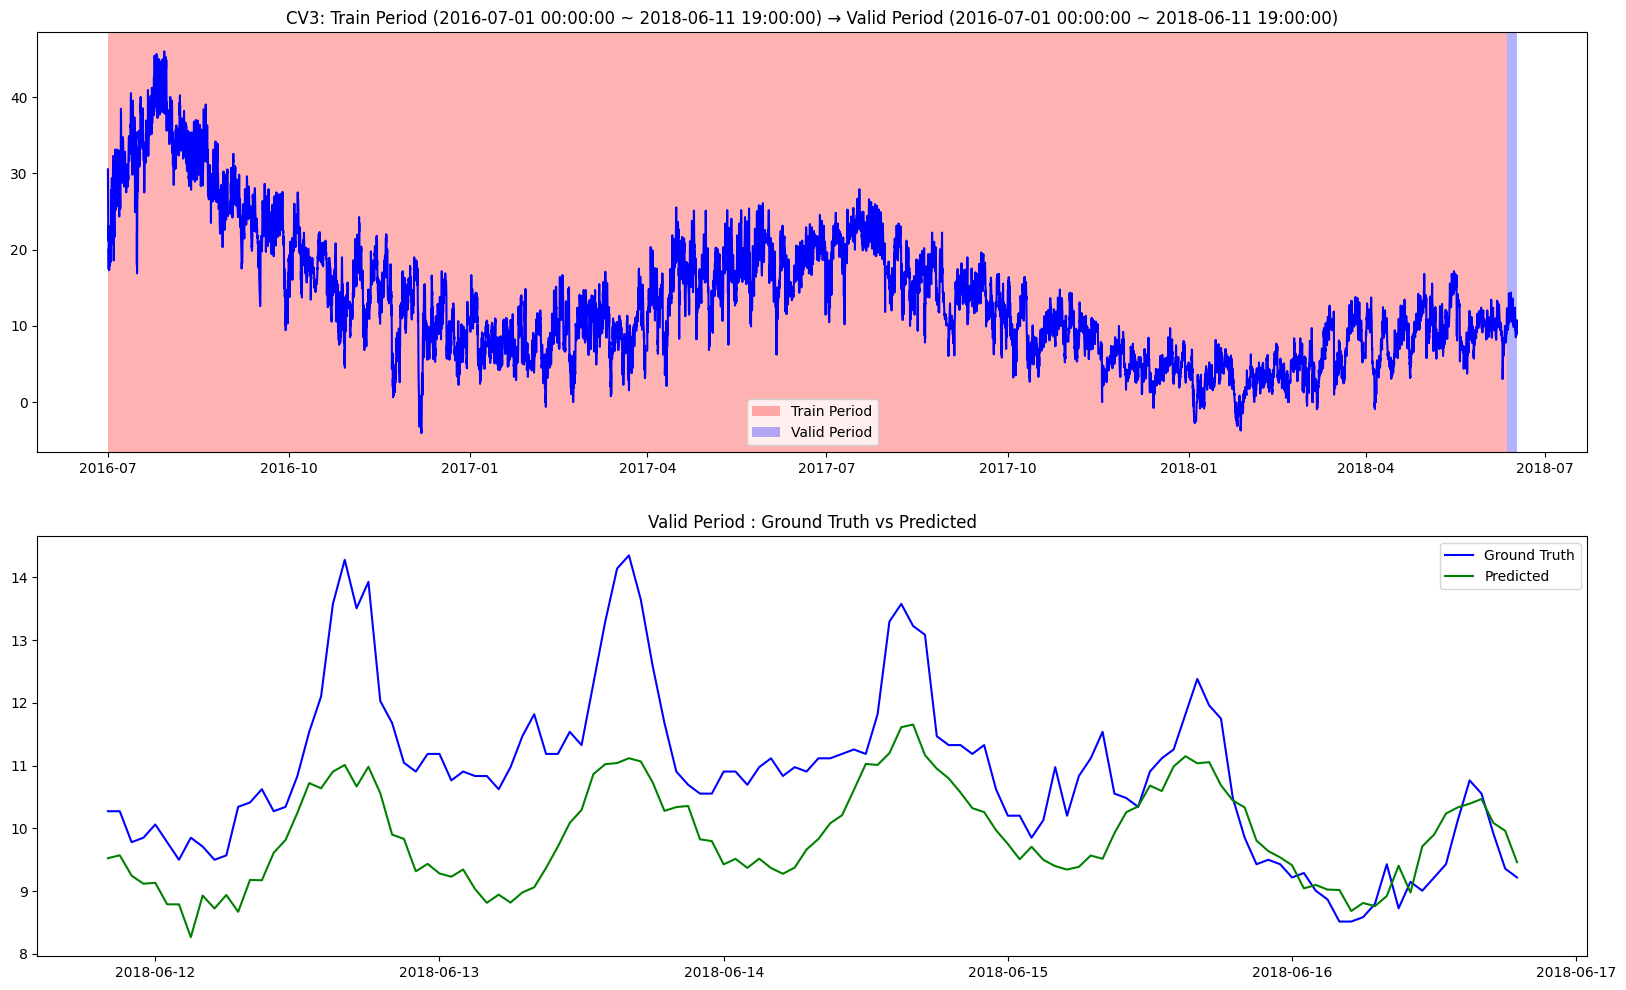

In [12]:
evaluationreport.train_cv_prediction_plot(evaluationreport.config,
                                          cv_result_dict,
                                          cv_score_df,
                                          cv='CV3')

# Inference pipeline


In [13]:
%%capture --no-display
pipeline = 'inference_pipeline'
wrapper.run_inference_pipeline();

## input asset
----

In [14]:
%%capture --no-display
input_asset_structure = wrapper.get_input_asset(wrapper.init_asset_structure, pipeline);

### input data 간략히 살펴보기

In [23]:
input_asset_structure.data['dataframe'].head(10)

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
5,2016-07-01 05:00:00,5.626,2.143,1.528,0.533,4.051,1.371,21.174000
6,2016-07-01 06:00:00,7.167,2.947,2.132,0.782,5.026,1.858,22.792000
7,2016-07-01 07:00:00,7.435,3.282,2.310,1.031,5.087,2.224,23.143999
8,2016-07-01 08:00:00,5.559,3.014,2.452,1.173,2.955,1.432,21.667000
9,2016-07-01 09:00:00,4.555,2.545,1.919,0.817,2.680,1.371,17.445999


## readiness asset
----

In [15]:
%%capture --no-display
readiness_asset_structure = wrapper.get_readiness_asset(input_asset_structure, pipeline);

## Bizpreprocess asset
----

In [16]:
%%capture --no-display
bizpreprocess_asset_structure = wrapper.get_bizpreprocess_asset(readiness_asset_structure, pipeline);

## inference asset
----

In [17]:
%%capture --no-display
inference_prediction_df = wrapper.get_inference_asset_output();
inference_asset_structure = copy(bizpreprocess_asset_structure)
evaluationreport = EvaluationReport(asset_structure=inference_asset_structure)

### 예측 결과 살펴보기

In [18]:
inference_prediction_df

,date,OT
0,2018-06-26 20:00:00,9.940855
1,2018-06-26 21:00:00,9.813231
2,2018-06-26 22:00:00,9.520439
3,2018-06-26 23:00:00,9.388357
4,2018-06-27 00:00:00,9.176662
...,...,...
115,2018-07-01 15:00:00,11.407313
116,2018-07-01 16:00:00,11.485134
117,2018-07-01 17:00:00,11.449304
118,2018-07-01 18:00:00,11.231518


### 예측 결과 시각화

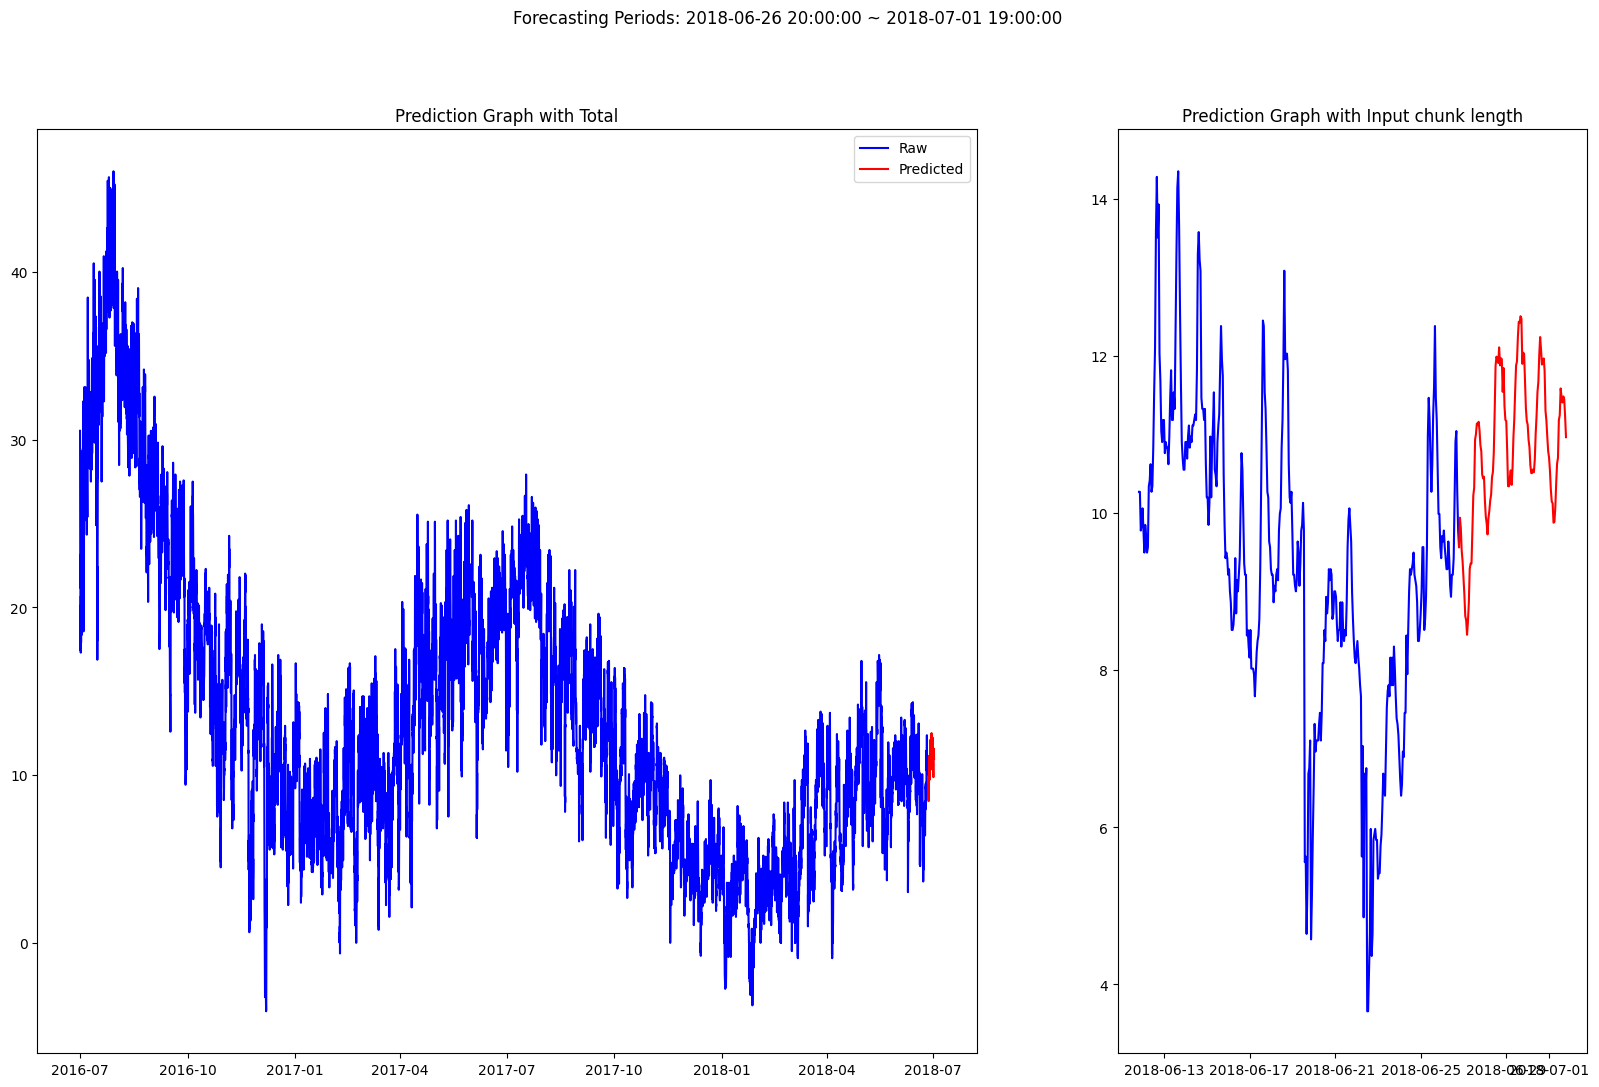

In [19]:
evaluationreport.inference_prediction_plot(evaluationreport.dataset,
                                           evaluationreport.config,
                                           inference_prediction_df)